In [5]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [42]:
#define State

class BMIState(TypedDict):

    weight_kg:float
    height_m:float
    bmi:float
    fitness:str

In [43]:
def calculate_bmi(state:BMIState) -> BMIState:

    weight=state['weight_kg']
    height=state['height_m'] 

    bmi=weight/(height**2)

    state['bmi']=round(bmi,2)

    return state


In [44]:
def judge_fit(state: BMIState) -> BMIState:
    print("Judge Fit called with BMI:", state.get('bmi'))  # Debug line

    bmi = state.get('bmi')

    if bmi is None:
        state['fitness'] = 'unknown'
    elif bmi < 18.5:
        state['fitness'] = 'fit hai boss'
    elif 18.5 <= bmi < 25:
        state['fitness'] = 'obese'
    else:
        state['fitness'] = 'fatty'

    return state


In [45]:
#define your graph

graph=StateGraph(BMIState)


#add nodes to your graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('judge_fit',judge_fit)


#add edges to your graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','judge_fit')
graph.add_edge('judge_fit',END)

#compile the graph

workflow=graph.compile()


In [46]:
#execute the graph

output_state=workflow.invoke({'weight_kg':80,'height_m':1.73})

Judge Fit called with BMI: 26.73


In [47]:
print(output_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'fitness': 'fatty'}


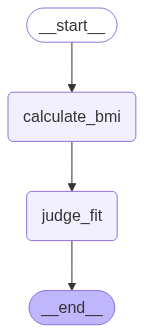

In [33]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())